Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\13135\AppData\Local\Temp\jieba.cache
Loading model cost 1.225 seconds.
Prefix dict has been built successfully.


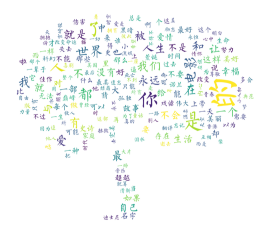

In [1]:
import numpy as np 
import sqlite3
import jieba
from PIL import Image
from matplotlib import pyplot as plt
from wordcloud import WordCloud

#准备词语的文字
con = sqlite3.connect("movie.db")
cur = con.cursor()
sql = 'select introduction from movie250'
data = cur.execute(sql)
text = ""
for item in data:
    text = text +item[0]
cur.close()
con.close()
cut = jieba.cut(text)
string = ' '.join(cut)
img = Image.open("wordcloud.jpeg")
img_array=np.array(img)#将图片转换为数组，好进一步计算
font = "myfont.ttf"
wc = WordCloud(
    scale = 4,
    background_color = "white",
    mask = img_array,
    font_path = font
)
wc.generate_from_text(string)
#绘制图像
fig = plt.figure()
plt.imshow(wc)
plt.axis('off')
plt.savefig("wordcloud.jpg",dpi=500)
plt.show()
